# Hello, pytorch

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/). For high-level interface see the next notebook.

__Pytorch feels__ differently than tensorflow/theano on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

And now we finally shut up and let pytorch do the talking.

In [1]:
# if running in colab, execute this:
# !wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week02_autodiff/notmnist.py -O notmnist.py
# !pip3 install torch==1.12.1 torchvision

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from __future__ import print_function
import numpy as np
import torch
print(torch.__version__)  # it's okay if your version is different, as long as it's 1.0 or newer

1.12.1


In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. No graph declaration, no placeholders, no sessions. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ an __free gradients__. Besides you can always jump back to numpy with x.numpy()

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


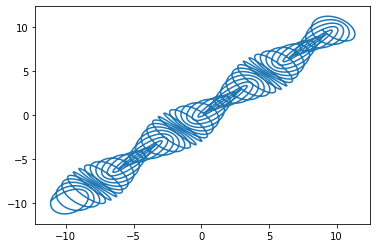

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x =  t - 1.5 * torch.cos(15*t)
y =  t - 1.5 * torch.sin(16*t)

plt.plot(x.numpy(), y.numpy())

if you're done early, try adjusting the formula and seing how  it affects the function

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```

__Here's an example:__ let's fit a linear regression on Boston house prices

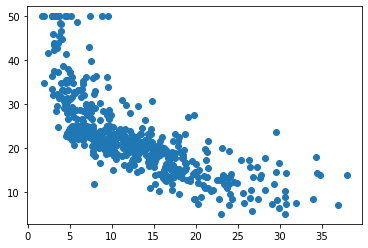

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [11]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [12]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

The gradients are now stored in `.grad` of those tensors that require them.

In [8]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


If you compute gradient from multiple losses, the gradients will add up at tensors, therefore it's useful to __zero the gradients__ between iteratons.

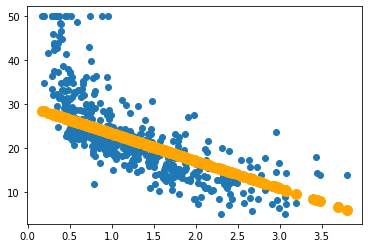

loss =  44.59417


In [9]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()
    
    with torch.no_grad():
        w.data = w - 0.05 * w.grad.data
        b.data = b - 0.05 * b.grad.data

        # zero gradients
        w.grad.zero_()
        b.grad.zero_()

    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.item() < 0.5:
            print("Done!")
            break

__Bonus quest__: try implementing and writing some nonlinear regression. You can try quadratic features or some trigonometry, or a simple neural network. The only difference is that now you have more weights and a more complicated `y_pred`. 

# High-level pytorch

So far we've been dealing with low-level torch API. While it's absolutely vital for any custom losses or layers, building large neura nets in it is a bit clumsy.

Luckily, there's also a high-level torch interface with a pre-defined layers, activations and training algorithms. 

We'll cover them as we go through a simple image recognition problem: classifying letters into __"A"__ vs __"B"__.


In [13]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i" % (len(X_train), len(X_test)))

--2022-11-07 13:12:49--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8,1M) [application/x-gzip]
Saving to: ‘notMNIST_small.tar.gz’

     0K .......... .......... .......... .......... ..........  0% 81,4K 1m41s
    50K .......... .......... .......... .......... ..........  1%  200K 71s
   100K .......... .......... .......... .......... ..........  1% 1,35M 49s
   150K .......... .......... .......... .......... ..........  2%  116K 54s
   200K .......... .......... .......... .......... ..........  3%  163K 52s
   250K .......... .......... .......... .......... ..........  3% 8,97M 44s
   300K .......... .......... .......... .......... ..........  4%  163K 44s
   350K .......... .......... .......... .......... ..........  4%  164K 44s
   400K .......... .......... ...

  5150K .......... .......... .......... .......... .......... 62%  551K 4s
  5200K .......... .......... .......... .......... .......... 63% 4,77M 4s
  5250K .......... .......... .......... .......... .......... 64% 1,16M 4s
  5300K .......... .......... .......... .......... .......... 64% 7,88M 4s
  5350K .......... .......... .......... .......... .......... 65% 2,36M 4s
  5400K .......... .......... .......... .......... .......... 65% 10,5M 4s
  5450K .......... .......... .......... .......... .......... 66%  916K 4s
  5500K .......... .......... .......... .......... .......... 67% 2,10M 4s
  5550K .......... .......... .......... .......... .......... 67% 2,83M 4s
  5600K .......... .......... .......... .......... .......... 68% 1,38M 4s
  5650K .......... .......... .......... .......... .......... 69% 2,20M 4s
  5700K .......... .......... .......... .......... .......... 69% 5,58M 3s
  5750K .......... .......... .......... .......... .......... 70% 4,69M 3s
  5800K ....

Extracting ...



x notMNIST_small/J/QmVybmhhcmQgTW9kZXJuIEJvbGQgSXRhbGljIEJULnR0Zg==.png
x notMNIST_small/J/SGFyZFRpbWVzUmVndWxhci5vdGY=.png
x notMNIST_small/J/SGVsdmV0aWNhLU5hcnJvdy1Cb2xkLm90Zg==.png
x notMNIST_small/J/QnJvY2h1cmUudHRm.png
x notMNIST_small/J/RnJhbmtmdXJ0R290aGljIEJvbGQudHRm.png
x notMNIST_small/J/RWR3YXJkRWR3aW4gQm9sZC50dGY=.png
x notMNIST_small/J/Q2VudHVyeSA3NTEgQm9sZCBJdGFsaWMucGZi.png
x notMNIST_small/J/R2Fycmlzb24gU2FucyBJVEFMSUMudHRm.png
x notMNIST_small/J/RG9nbWFCb2xkLm90Zg==.png
x notMNIST_small/J/Qm9kb25pT2xkRmFjZUV4cEJRLU1lZGl1bS5vdGY=.png
x notMNIST_small/J/RXJhc0lUQ2J5QlQtRGVtaS5vdGY=.png
x notMNIST_small/J/QXJpZElUQy5vdGY=.png
x notMNIST_small/J/RnJlZWRvbSA5IFdpZGUgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/J/QXJtZW5zY2hyaWZ0LnR0Zg==.png
x notMNIST_small/J/Q29ybmV0IFNjcmlwdC50dGY=.png
x notMNIST_small/J/R2FyYW1vbmRJdGNULUxpZ2h0Lm90Zg==.png
x notMNIST_small/J/Q29taWNCb29rLm90Zg==.png
x notMNIST_small/J/RW1pZ3JlRmlmVGVlbi50dGY=.png
x notMNIST_small/J/RW5zaWduIEZsYW5kcnkudHRm

x notMNIST_small/J/SVRDIEFtZXJpY2FuIFR5cGV3cml0ZXIgQm9sZCBBbHRlcm5hdGUucGZi.png
x notMNIST_small/J/SGVsdmV0aWNhSW5zZXJhdEJRLVJlZ3VsYXIub3Rm.png
x notMNIST_small/J/QWlybGluZS1Ob3JtYWwub3Rm.png
x notMNIST_small/J/Qml0c3RyZWFtIFZlcmEgU2VyaWYgQm9sZC50dGY=.png
x notMNIST_small/J/QXVndXN0YUNhbmNlbGxhcmVzY2FTdGQtUmVnLm90Zg==.png
x notMNIST_small/J/RmVkZXJhdGlvbiBTdGFyZmxlZXQgMS50dGY=.png
x notMNIST_small/J/Qm90b25CUS1NZWRpdW1JdGFsaWMub3Rm.png
x notMNIST_small/J/Qmxhdmlja2UgQ2FwaXRhbHMgU2VtaS1leHBhbmRlZCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/J/Q2Fyb2xzQ2h1bmtzLnR0Zg==.png
x notMNIST_small/J/QmV0b25FRi1FeHRyYUJvbGQub3Rm.png
x notMNIST_small/J/QXZlbmlyLU9ibGlxdWUub3Rm.png
x notMNIST_small/J/Q2FyYm9uIEJsb2NrLnR0Zg==.png
x notMNIST_small/J/Qm9kb25pT2xkRmFjZUJRLUl0YWxpYy5vdGY=.png
x notMNIST_small/J/QWF1eCBQcm9SZWd1bGFyIEl0YWxpYyBTQy50dGY=.png
x notMNIST_small/J/QmVuZ3VpYXRHb3RoaWNCUS1NZWRpdW0ub3Rm.png
x notMNIST_small/J/SGVsdmV0aWNhTmV1ZUxUU3RkLUJkSXQub3Rm.png
x notMNIST_small/J/SVRDIEF2YW50IEdhc

x notMNIST_small/E/R3Jhdml0eSBTdWNrcy50dGY=.png
x notMNIST_small/E/QmFuZ2xlIENvbmRlbnNlZCBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/E/QnVsbC1VbmRlcklua2VkLm90Zg==.png
x notMNIST_small/E/Q3VzaGluZ0VGLUhlYXZ5SXRhbGljLm90Zg==.png
x notMNIST_small/E/QWFjaGVuIExUIEJvbGQudHRm.png
x notMNIST_small/E/RnJhbmtsaW5BbnRpcXVhQlEtTWVkaXVtLm90Zg==.png
x notMNIST_small/E/QXJjaGUgQmxhY2sgQ29uZGVuc2VkIFNTaSBCbGFjayBDb25kZW5zZWQudHRm.png
x notMNIST_small/E/RnV0dXJpc1hDb25kQy1Cb2xkLm90Zg==.png
x notMNIST_small/E/QmF1aGF1cy1EZW1pLm90Zg==.png
x notMNIST_small/E/RnJ1dGlnZXJOZXh0TFQtTGlnaHRDb25kLm90Zg==.png
x notMNIST_small/E/Q291cmllci1Cb2xkLm90Zg==.png
x notMNIST_small/E/R2FydGhHcmFwaGljU3RkLUV4dHJhQm9sZC5vdGY=.png
x notMNIST_small/E/Qm9kb25pIFNTaS50dGY=.png
x notMNIST_small/E/QnJvYWR3YXlFbmdyYXZlZEJULVJlZ3VsYXIub3Rm.png
x notMNIST_small/E/SGVsdmV0aWNhLUNvbmRlbnNlZC1UaGluLnR0Zg==.png
x notMNIST_small/E/RnJha3R1ciBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/E/SVRDIEdhcmFtb25kIEJvb2sgQ29uZGVuc2VkLnBmYg==.png
x no

x notMNIST_small/E/R2VzdGFsdC1IVEYtTGluZWFyLU1lZGl1bS5vdGY=.png
x notMNIST_small/E/RWxlY3RybyBHb3RoaWMgSFBMSFMudHRm.png
x notMNIST_small/E/Q2hlbHRlbmhhbUlUQ0JRLUJvb2sub3Rm.png
x notMNIST_small/E/QWNhbnRodXMgU1NpIEl0YWxpYy50dGY=.png
x notMNIST_small/E/Q291cmllcjEwIEJUIEl0YWxpYy50dGY=.png
x notMNIST_small/E/Q29tbWVyY2UgQ29uZGVuc2VkIFNTaSBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/QW50aXF1ZU9saVQtQm9sZENvbmRJbjEub3Rm.png
x notMNIST_small/E/QWt6aWRlbnpHcm90ZXNrLUJsYWNrLm90Zg==.png
x notMNIST_small/E/QnJvYWR3YXlQLnR0Zg==.png
x notMNIST_small/E/RnV0dXJpc1NoYWRvd0Mub3Rm.png
x notMNIST_small/E/Q2xhcmVuZG9uQlEtQmxhY2sub3Rm.png
x notMNIST_small/E/RGVsbGEgUm9iYmlhIEJULnR0Zg==.png
x notMNIST_small/E/Q2FsZ2FyeS1MaWdodC5vdGY=.png
x notMNIST_small/E/R3JlZW4gRnV6LnR0Zg==.png
x notMNIST_small/E/MTh0aENlbnR1cnkudHRm.png
x notMNIST_small/E/RGF2aWQgQm9sZCgxKS50dGY=.png
x notMNIST_small/E/R2VvIDk1NyBJdGFsaWMudHRm.png
x notMNIST_small/E/R3JlbWxpbkNhcHMgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/RnJhb

x notMNIST_small/I/SHZTdHJpcGUtRXh0cmFCb2xkLnR0Zg==.png
x notMNIST_small/I/Q0sgUGluay50dGY=.png
x notMNIST_small/I/SWNvbG5vdmEtTWVkaXVtLm90Zg==.png
x notMNIST_small/I/QW50aXF1ZU9saVNDVC1SZWd1Lm90Zg==.png
x notMNIST_small/I/RmlndXJueS50dGY=.png
x notMNIST_small/I/RHJlYW1zcGVhayBCb2xkLnR0Zg==.png
x notMNIST_small/I/RWxlY3Ryb2hhcm1vbml4Lm90Zg==.png
x notMNIST_small/I/RnJhbmtsaW5JVENCUS1EZW1pLm90Zg==.png
x notMNIST_small/I/RnJpZ2F0ZS50dGY=.png
x notMNIST_small/I/Q3J1c3RpRXN0LnR0Zg==.png
x notMNIST_small/I/Q2hhbGV0Qm9vayBCb2xkLm90Zg==.png
x notMNIST_small/I/QW1lbGlhTEwub3Rm.png
x notMNIST_small/I/QnJhbmRvIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/I/QmVla21hbi1TcXVhcmVCb2xkLm90Zg==.png
x notMNIST_small/I/RWx5c2l1bVN0ZC1NZWRpdW0ub3Rm.png
x notMNIST_small/I/RHJhZ2dsZSBCUksudHRm.png
x notMNIST_small/I/R290aGljIDcyMCBJdGFsaWMgQlQudHRm.png
x notMNIST_small/I/SVRDQXZhbnRHYXJkZVN0ZC1Cb2xkQ24ub3Rm.png
x notMNIST_small/I/QmFrZXIgU2lnbmV0IEJULnR0Zg==.png
x notMNIST_small/I/Q29jb24tUmVndWxhci5vdGY=.png


x notMNIST_small/I/QmVuZ3VpYXRHb3RoaWNMVC1IZWF2eS5vdGY=.png
x notMNIST_small/I/RGphbmdvIElUQyBTdGQub3Rm.png
x notMNIST_small/I/RWx3b29kLnR0Zg==.png
x notMNIST_small/I/QW1lcmljYW5hU3RkLUJvbGQub3Rm.png
x notMNIST_small/I/SGFycG9vbi50dGY=.png
x notMNIST_small/I/R2lvdmFubmlTdGQtQm9vay5vdGY=.png
x notMNIST_small/I/Rm9saW8gRXh0cmEgQm9sZC5wZmI=.png
x notMNIST_small/I/Q2hhcnRlcklUQ2J5QlQtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/I/Q29tcGFjdGEucGZi.png
x notMNIST_small/I/SGlwSG9wRGVtaS50dGY=.png
x notMNIST_small/I/RWxlcGhhbnQgQ29uZGVuc2VkIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/I/QmxvdHRvb280MG96LnR0Zg==.png
x notMNIST_small/I/R3Jlbm9ibGUgU0YgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/I/Q2Fzc2FuZHJhLnR0Zg==.png
x notMNIST_small/I/QWxsdXJlQm9sZEFsdFNwYWNlLm90Zg==.png
x notMNIST_small/I/QXVndXN0YVNjaG51cmtsU3RkLVJlZy5vdGY=.png
x notMNIST_small/I/RnJlaWdodEJpZ0JsYWNrSXRhbGljLnR0Zg==.png
x notMNIST_small/I/Q2xlYXJ2aWV3SHd5LTYtQi50dGY=.png
x notMNIST_small/I/RXhpdCBmb250IChmb3IgYSBmaWxtKS50dGY=.png


x notMNIST_small/I/RnV0dXJhQmxhY2tFRi5vdGY=.png
x notMNIST_small/I/R2lsbCBTYW5zIE1UIEl0YWxpYy50dGY=.png
x notMNIST_small/I/Qm9va21hbiBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/I/Q2hhcnRlcklUQy1SZWd1SXRhbC5vdGY=.png
x notMNIST_small/I/Q2xhaXJ2YXV4TFRTdGQub3Rm.png
x notMNIST_small/I/QnJpc2sudHRm.png
x notMNIST_small/I/R290aGljNzIwIEx0IEJUIExpZ2h0LnR0Zg==.png
x notMNIST_small/I/Q29wcGVycGxhdGVULUJvbGRDb25kZW5zZWQub3Rm.png
x notMNIST_small/I/RGF5dHJpcHBlciBQbGFpbi50dGY=.png
x notMNIST_small/I/R2xvc3NhcnkgQmxhY2sgU1NpIEJsYWNrLnR0Zg==.png
x notMNIST_small/I/RmxvcmFEb3JhTkYudHRm.png
x notMNIST_small/I/SGVsdmV0aWNhTmV1ZUxULUJvbGRFeHRPYmwub3Rm.png
x notMNIST_small/I/Q2hpY2Fnb0xhc2VyIE1lZGl1bS50dGY=.png
x notMNIST_small/I/Q29tcGF0aWxUZXh0IExUIFJlZ3VsYXIgU21hbGwgQ2Fwcy50dGY=.png
x notMNIST_small/I/R290aGljIFNTaS50dGY=.png
x notMNIST_small/I/Rm9saW8gQmsgQlQgQm9sZC50dGY=.png
x notMNIST_small/I/Q29udGV4dCBSZXByaXNlIE1lZGl1bSBTU2kgTWVkaXVtLnR0Zg==.png
x notMNIST_small/I/Q3V0dGVyUm9tYW4ub3Rm.png
x notMNI

x notMNIST_small/A/Q2VudHVyeSA3NTEgQm9sZCBJdGFsaWMucGZi.png
x notMNIST_small/A/R2Fycmlzb24gU2FucyBJVEFMSUMudHRm.png
x notMNIST_small/A/RG9nbWFCb2xkLm90Zg==.png
x notMNIST_small/A/Qm9kb25pT2xkRmFjZUV4cEJRLU1lZGl1bS5vdGY=.png
x notMNIST_small/A/RXJhc0lUQ2J5QlQtRGVtaS5vdGY=.png
x notMNIST_small/A/QXJpZElUQy5vdGY=.png
x notMNIST_small/A/RnJlZWRvbSA5IFdpZGUgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/A/QXJtZW5zY2hyaWZ0LnR0Zg==.png
x notMNIST_small/A/Q29ybmV0IFNjcmlwdC50dGY=.png
x notMNIST_small/A/R2FyYW1vbmRJdGNULUxpZ2h0Lm90Zg==.png
x notMNIST_small/A/Q29taWNCb29rLm90Zg==.png
x notMNIST_small/A/RW1pZ3JlRmlmVGVlbi50dGY=.png
x notMNIST_small/A/RW5zaWduIEZsYW5kcnkudHRm.png
x notMNIST_small/A/Rm9vdGxpZ2h0TVRTdGQtSXRhbGljLm90Zg==.png
x notMNIST_small/A/QmlsbGJvYXJkIDExIENvbmRlbnNlZCBOb3JtYWwudHRm.png
x notMNIST_small/A/QWRpbmVLaXJuYmVyZyBSZWd1bGFyKDEpLnR0Zg==.png
x notMNIST_small/A/RXVyYXNpYSBDb25kZW5zZWQgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/A/Q2VudHVyeTcyNUJULVJvbWFuQ29uZGVuc2VkLm90Zg==.png


x notMNIST_small/A/RWd5cHRpZW5uZUYtQm9sZC5vdGY=.png
x notMNIST_small/A/QWxpeDIudHRm.png
x notMNIST_small/A/SG9ybGV5IE9TIE1UIEl0YWxpYy50dGY=.png
x notMNIST_small/A/RWxlbWVudGFTeW1ib2wtSXRhbGljLm90Zg==.png
x notMNIST_small/A/Q2hvcmQtQmxhY2sub3Rm.png
x notMNIST_small/A/Q2hlbHRlbmhtIEJUIEl0YWxpYy50dGY=.png
x notMNIST_small/A/QW1lcmljYW5UeXBlQm9sZC5vdGY=.png
x notMNIST_small/A/RGVtb3R0ZSBCb2xkLnR0Zg==.png
x notMNIST_small/A/Q2hpc2VsIFRoaW4gQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/A/SGVsdmV0aWNhUm91bmRlZExULUJvbGRDb25kT2JsLm90Zg==.png
x notMNIST_small/A/RnJlbmNoIDExMS5wZmI=.png
x notMNIST_small/A/RGFudGVNVFN0ZC1JdGFsaWMub3Rm.png
x notMNIST_small/A/QWR2ZW50dXJlciBMaWdodCBTRi50dGY=.png
x notMNIST_small/A/QmFzZU5pbmVTQ0IudHRm.png
x notMNIST_small/A/RkZGIFByb3RlZ2UgRXh0ZW5kZWQudHRm.png
x notMNIST_small/A/Q29hZ3VsYXRlLnR0Zg==.png
x notMNIST_small/A/RnJvc3R5c0hhbmQgUmVndWxhci50dGY=.png
x notMNIST_small/A/QmFza2VydmlsbGVULVJlZ3Uub3Rm.png
x notMNIST_small/A/Q2FzbG9uVHdvVHdlbnR5Rm91ci1NZWRpdW0ub3Rm.

x notMNIST_small/G/Q29jb24tUmVndWxhci5vdGY=.png
x notMNIST_small/G/Qm9kb25pQkUtUmVndWxhci5vdGY=.png
x notMNIST_small/G/QmVuZ3VpYXRHb3RoaWNTdGQtTWVkaXVtLm90Zg==.png
x notMNIST_small/G/Rmx5d2hlZWxTcXVhcmUudHRm.png
x notMNIST_small/G/Rm9ybXVsYS1FeHRyYUJvbGQub3Rm.png
x notMNIST_small/G/QmVjY2FyaWEudHRm.png
x notMNIST_small/G/R29uZG9saWVyZS50dGY=.png
x notMNIST_small/G/SGVsaW5kYVJvb2tTdGQub3Rm.png
x notMNIST_small/G/QmF1aGF1cyBCb2xkLnR0Zg==.png
x notMNIST_small/G/QW1lcmlnbyBCVCBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/G/RGF2aWRGYXJld2VsbFN0ZW5jaWwudHRm.png
x notMNIST_small/G/RXJhc0VGLUJvbGQub3Rm.png
x notMNIST_small/G/Q2hheiBXaWRlIE5vcm1hbC50dGY=.png
x notMNIST_small/G/QmFza2VydmlsbGVULVJlZ3VJdGFsLm90Zg==.png
x notMNIST_small/G/Q29ycGlkQ2RMRi1MaWdodC5vdGY=.png
x notMNIST_small/G/QmFza2VydmlsbGUgQm9sZCBJdCBXaW45NUJUKDEpLnR0Zg==.png
x notMNIST_small/G/SGlnaGxhbmRlclN0ZC1Cb29rLm90Zg==.png
x notMNIST_small/G/R2FyYW1vbmRJdGNULUxpZ2h0Q29uZGVuc2VkSXRhbGljLm90Zg==.png
x notMNIST_small/G/QmVydHJhb

x notMNIST_small/G/Qm9vemxlIERpc3BsYXkgU1NpIEl0YWxpYy50dGY=.png
x notMNIST_small/G/R2VvbWV0cmljIDQxNSBCbGFjayBCVC50dGY=.png
x notMNIST_small/G/Q2VudGVubmlhbC1CbGFjay5vdGY=.png
x notMNIST_small/G/Q29uY3Vyc29JdGFsaWFuIEJUTiBMaW5lZCBPYmxpcXVlLnR0Zg==.png
x notMNIST_small/G/Qm9va21hbiBPbGQgU3R5bGUgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/G/R2lsbCBTU2kgQm9sZC50dGY=.png
x notMNIST_small/G/RGluZy1Eb25nRGFkZHlPLnR0Zg==.png
x notMNIST_small/G/RGFzaCBEb3QgQlJLLnR0Zg==.png
x notMNIST_small/G/RFRMQXJnb1NULUJsYWNrLm90Zg==.png
x notMNIST_small/G/QXN0dXRlIEl0YWxpYy50dGY=.png
x notMNIST_small/G/R2VvUGxhaW4udHRm.png
x notMNIST_small/G/QWFyb25Cb2xkLnR0Zg==.png
x notMNIST_small/G/QWxwaGEgRmxpZ2h0IFNvbGlkIFNtYWxsIENhcHMudHRm.png
x notMNIST_small/G/QmFyY2Vsb25hIEJvbGQudHRm.png
x notMNIST_small/G/Q2hhbmV5IEV4dGVuZGVkIE5vcm1hbC50dGY=.png
x notMNIST_small/G/R3JpZmZpdGhHb3RoaWMtQmxhY2sub3Rm.png
x notMNIST_small/G/R2FyYW1vbmRCRS1NZWRpdW1Dbk9zRi5vdGY=.png
x notMNIST_small/G/RW5nbGlzY2hlU2NocmVpYnNjaHJpZnRCUS1Cb

x notMNIST_small/F/Qm9kb25pRUYtTGlnaHQub3Rm.png
x notMNIST_small/F/RnV0dXJpc3RCbGFjayBJdGFsaWMudHRm.png
x notMNIST_small/F/QmVybGluZXJHcm90ZXNrLUxpZ2h0Lm90Zg==.png
x notMNIST_small/F/QnJpZW1TY3JpcHRTdGQtQm9sZC5vdGY=.png
x notMNIST_small/F/SHVtYW5hIFNjcmlwdCBJVEMgVFQgQm9sZC50dGY=.png
x notMNIST_small/F/Qmlqb3V4LUJvbGQub3Rm.png
x notMNIST_small/F/RWxsaW5ndG9uIE1UIEJvbGQudHRm.png
x notMNIST_small/F/RmF1eC1SZWd1bGFyLm90Zg==.png
x notMNIST_small/F/Q2FzbG9uIEJvb2sgQkUgQm9sZC50dGY=.png
x notMNIST_small/F/Q2hlbHRlbmhhbVN0ZC1Cb2xkLm90Zg==.png
x notMNIST_small/F/Rm9saW9CVC1MaWdodEl0YWxpYy5vdGY=.png
x notMNIST_small/F/SGVsdmV0aWNhQlEtQmxhY2tJdGFsaWMub3Rm.png
x notMNIST_small/F/QnJ1aXNlZCBUd2VudHlGaXZlLnR0Zg==.png
x notMNIST_small/F/RmxldGNoIFdpZGUgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/F/QWxwaGFiZXRTb3VwQlQtVGlsdC5vdGY=.png
x notMNIST_small/F/R2FyYW1vbmQtTm9ybWFsIEJvbGQgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/RmxhdCBCcnVzaCBUaGluIE5vcm1hbC50dGY=.png
x notMNIST_small/F/QmVybmhhcmQgTW9kZXJuIEJvb

x notMNIST_small/F/Q3VzaGluZ0Jvb2tJdGFsaWMub3Rm.png
x notMNIST_small/F/QnJhbmRpbmcgSXJvbi50dGY=.png
x notMNIST_small/F/Rm9ybWFsNDM2IEJULnR0Zg==.png
x notMNIST_small/F/SGlzdG9yeSBSZXBlYXRpbmcgVmVydGljYWwudHRm.png
x notMNIST_small/F/SGVsdmV0aWNhLUNvbmRlbnNlZC1PYmxpcXVlLm90Zg==.png
x notMNIST_small/F/QXJydXNPU0ZCVC1Sb21hbi5vdGY=.png
x notMNIST_small/F/RnJhbmtsaW5Hb3RoaWNMVC1EZW1pQ25kLm90Zg==.png
x notMNIST_small/F/Q2VudHVyeS1TY2hvb2xib29rLU5vcm1hbC50dGY=.png
x notMNIST_small/F/SGVhZGxpbmUgVGhpbiBJdGFsaWMudHRm.png
x notMNIST_small/F/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png
x notMNIST_small/F/RXZhbmdlbGljQm9sZC5vdGY=.png
x notMNIST_small/F/RXVyb1RlY2huaWNPdXRsaW5lLm90Zg==.png
x notMNIST_small/F/R2VvbWV0cmljIDIzMSBMaWdodC5wZmI=.png
x notMNIST_small/F/SG91c2VHb3RoaWNIRzIzVGV4dC1MaWdodC5vdGY=.png
x notMNIST_small/F/Q2Fpcm9FeHRlbmRlZEl0YWxpYyBJdGFsaWMudHRm.png
x notMNIST_small/F/Qm9kb3hpLURlbWlCb2xkLm90Zg==.png
x notMNIST_small/F/Q2FsaXMgaW4gUHVwcGV0bGFuZC50dGY=.png
x notMNIST_small/F/QWxwaGEgRmxpZ2h0L

x notMNIST_small/B/RFRMTm9iZWxUTGlnaHQtSXRhbGljLm90Zg==.png
x notMNIST_small/B/RHJhZ29uRUYtRXh0cmFMaWdodC5vdGY=.png
x notMNIST_small/B/SG91bmRzIEJvbGQudHRm.png
x notMNIST_small/B/QmFsYW5jZUxpZ2h0LUl0YWxpYy5vdGY=.png
x notMNIST_small/B/Qm9kb25pSUNHLm90Zg==.png
x notMNIST_small/B/Qm9yZGVhdXggSUNHLnR0Zg==.png
x notMNIST_small/B/RnJpeiBRdWFkcmF0YSBJdGMgVCBFRSBSZWd1bGFyLnBmYg==.png
x notMNIST_small/B/RFRMRG9yaWFuU1QtQmxhY2sub3Rm.png
x notMNIST_small/B/QUZDYXJwbGF0ZXMtQm9sZC5vdGY=.png
x notMNIST_small/B/RmF1eENSQS1MaWdodEl0YWxpYy5vdGY=.png
x notMNIST_small/B/QXN0cm9PYmxpcXVlLnR0Zg==.png
x notMNIST_small/B/QmlnIEJhY29uIFRyeW91dC50dGY=.png
x notMNIST_small/B/RmF1eENSQS1JdGFsaWMub3Rm.png
x notMNIST_small/B/QWdlbmN5RkItQm9sZENvbmRlbnNlZC5vdGY=.png
x notMNIST_small/B/RmluZXByaW50U3RkLUxpZ2h0Lm90Zg==.png
x notMNIST_small/B/RXJhcyBJdGMgVCBFRSBNZWRpdW0ucGZi.png
x notMNIST_small/B/QXVyZWFVbHRyYS1JdGFsaWMub3Rm.png
x notMNIST_small/B/QWRlbG9uLURlbWlCb2xkLm90Zg==.png
x notMNIST_small/B/QWR2ZXJ0aXNlcnNHb

x notMNIST_small/B/RmVsdGhnb3RoaWMtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/B/RGVsdGEtTWVkaXVtLm90Zg==.png
x notMNIST_small/B/QWRvYmVBcmFiaWMtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/B/Q29jYWluZSBTYW5zLnR0Zg==.png
x notMNIST_small/B/QnVuZHkgWWVsbG93IEhvbGxvd1NoYWRvd2VkLnR0Zg==.png
x notMNIST_small/B/SGVhZGVyMTc2Ny50dGY=.png
x notMNIST_small/B/Qm9ndXNmbG93LnR0Zg==.png
x notMNIST_small/B/Q0NTcG9va3l0b290aC1SZWd1bGFyLnR0Zg==.png
x notMNIST_small/B/RGlzY28gSW5mZXJuby50dGY=.png
x notMNIST_small/B/RXllIGdsYXNzIFdpZGUgSXRhbGljLnR0Zg==.png
x notMNIST_small/B/QWJhZGlNVFN0ZC1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/B/RXVudXZlcnNlLUl0YWxpYy5vdGY=.png
x notMNIST_small/B/QmFza2VydmlsbGVCUS1JdGFsaWMub3Rm.png
x notMNIST_small/B/Qm9vemxlIERpc3BsYXkgU1NpIEl0YWxpYy50dGY=.png
x notMNIST_small/B/R2VvbWV0cmljIDQxNSBCbGFjayBCVC50dGY=.png
x notMNIST_small/B/Q2VudGVubmlhbC1CbGFjay5vdGY=.png
x notMNIST_small/B/Q29uY3Vyc29JdGFsaWFuIEJUTiBMaW5lZCBPYmxpcXVlLnR0Zg==.png
x notMNIST_small/B/Qm9va21hbiBPbGQgU3R5b

x notMNIST_small/D/RWRpc29uRUYtU2VtaUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/D/QW1vcyBFeHRlbmRlZCBJdGFsaWMudHRm.png
x notMNIST_small/D/Q2hlbHNleSBXaWRlIE5vcm1hbC50dGY=.png
x notMNIST_small/D/Q2xlYXJmYWNlTVRTdGQtQm9sZC5vdGY=.png
x notMNIST_small/D/Q3Jvc2J5c0hhbmQudHRm.png
x notMNIST_small/D/RFRMUGFyYWRveFNULU1lZGl1bS5vdGY=.png
x notMNIST_small/D/Q29tcGFjdGEgSUNHIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/D/R290aGljIDcyMCBCb2xkIEJULnR0Zg==.png
x notMNIST_small/D/RXJhcyBVbHRyYSBCVC50dGY=.png
x notMNIST_small/D/QWxpZW4gTWFya3NtYW5SZWd1bGFyLnR0Zg==.png
x notMNIST_small/D/SGFsZkxpZmUudHRm.png
x notMNIST_small/D/Q29ycG9yYXRlUy1EZW1pSXRhbGljLm90Zg==.png
x notMNIST_small/D/QmFzZU5pbmVTbWFsbENhcHMgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/D/Qm9kb25pQmVydENvbkJRLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/D/QmluZ28ub3Rm.png
x notMNIST_small/D/RmlsdGVDYXN1YWwudHRm.png
x notMNIST_small/D/SGVhZGxpbmVNVFN0ZC1Cb2xkLm90Zg==.png
x notMNIST_small/D/Q29jaGluIExULnR0Zg==.png
x notMNIST_small/D/Rm9ybXVsYS1FeHRyY

x notMNIST_small/D/SGVsdmV0aWNhTmV1ZUxULVRoaW5FeHQub3Rm.png
x notMNIST_small/D/QW1lcmljYW4gUG9wIFBsYWluLnR0Zg==.png
x notMNIST_small/D/RHdhcmZGYXRPbGRTdHlsZURpZ2l0cy5vdGY=.png
x notMNIST_small/D/RnJlaWdodEJpZ0xpZ2h0SXRhbGljU0MudHRm.png
x notMNIST_small/D/RmVuaWNlLVVsdHJhLm90Zg==.png
x notMNIST_small/D/RnJhbmNpcy5vdGY=.png
x notMNIST_small/D/QmxhY2thZGRlciBJVEMgVFQudHRm.png
x notMNIST_small/D/RHJhZ29uRUYtRGVtaUJvbGQub3Rm.png
x notMNIST_small/D/RmlnaHQgVGhpcy50dGY=.png
x notMNIST_small/D/R2lsbFNhbnNNVFN0ZC1Cb2xkLm90Zg==.png
x notMNIST_small/D/QmVhbSBSaWRlciBFeHBhbmRlZC50dGY=.png
x notMNIST_small/D/Q2xlb3BhdHJhLm90Zg==.png
x notMNIST_small/D/RWxlZ2FHYXJtbmQgQlQgSXRhbGljLnR0Zg==.png
x notMNIST_small/D/R2VvbWV0cjIxMiBCayBCVCBCb29rLnR0Zg==.png
x notMNIST_small/D/Q2VudHVyeSBTY2hvb2xib29rIEl0YWxpYy5wZmI=.png
x notMNIST_small/D/SGlnaHN0YWtlcyBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/D/Q29tcHJlc3Nvci1TbGFiU2VyaWYub3Rm.png
x notMNIST_small/D/RWxHYXIgQm9sZC50dGY=.png
x notMNIST_small/D/Q2xpcXVlLVNlc

x notMNIST_small/D/QW5kYWxlTW9ub01UU3RkLUJvbGQub3Rm.png
x notMNIST_small/D/RnV0dXJhTFQtQm9va09ibGlxdWUub3Rm.png
x notMNIST_small/D/R2luZ2VyLUxpZ2h0SXRhbGljLm90Zg==.png
x notMNIST_small/D/SWJhbGxhbnRpbmVzLUJvbGQub3Rm.png
x notMNIST_small/D/QWxlbWJpY0JldGEtUmVndWxhclR3by5vdGY=.png
x notMNIST_small/D/R2luZ2VyLVJlZ3VsYXJJdGFsaWNFeHBlcnQub3Rm.png
x notMNIST_small/D/QWVvc0xpZ2F0dXJlLm90Zg==.png
x notMNIST_small/D/QW1UeXBld3JpdGVyRUYtTGlnaHQub3Rm.png
x notMNIST_small/D/Q292aW5ndG9uIFNoYWRvdyBJdGFsaWMudHRm.png
x notMNIST_small/D/Qm9kb25pRUYtRGVtaUJvbGQub3Rm.png
x notMNIST_small/D/RmVuaWNlRXhwZXJ0QlEtUmVndWxhci5vdGY=.png
x notMNIST_small/D/QW5uYWJlbGxlIEpGLnR0Zg==.png
x notMNIST_small/D/QmVuZ3VpYXRHb3RoaWNCUS1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/D/Rm91bHRvbi50dGY=.png
x notMNIST_small/D/Q3VzaGluZ0Jvb2tJdGFsaWMub3Rm.png
x notMNIST_small/D/QnJhbmRpbmcgSXJvbi50dGY=.png
x notMNIST_small/D/Rm9ybWFsNDM2IEJULnR0Zg==.png
x notMNIST_small/D/SGlzdG9yeSBSZXBlYXRpbmcgVmVydGljYWwudHRm.png
x notMNIST_s

x notMNIST_small/H/Q2FybGEgQm9sZC50dGY=.png
x notMNIST_small/H/Q2hlbHRlbmhhbU9sZFN0eWxlRUYub3Rm.png
x notMNIST_small/H/RHJvbW9uLnR0Zg==.png
x notMNIST_small/H/R2FzdGFkYS50dGY=.png
x notMNIST_small/H/QWxtb250ZS50dGY=.png
x notMNIST_small/H/MDRiXzA4LnR0Zg==.png
x notMNIST_small/H/Q2hhc2xpbmUtQm9sZC5vdGY=.png
x notMNIST_small/H/Q29sb255Lm90Zg==.png
x notMNIST_small/H/R3JhcGhpYyBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/H/QmxhZGUudHRm.png
x notMNIST_small/H/QmxhY2tmb3JkIE9sZFN0eWxlIFNTaSBTbWFsbCBDYXBzLnR0Zg==.png
x notMNIST_small/H/Qm9kb25pQ2xhc3NpYy1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/H/Q2FyZ28gVHdvIFNGLnR0Zg==.png
x notMNIST_small/H/Q2F0aGFyc2lzIENhcmdvLnR0Zg==.png
x notMNIST_small/H/QmxvY0Mub3Rm.png
x notMNIST_small/H/QmlubmVyRC50dGY=.png
x notMNIST_small/H/RGlhbWFudGUtQm9sZC5vdGY=.png
x notMNIST_small/H/QmFsbGFudGluZXMtRGVtaUJvbGQub3Rm.png
x notMNIST_small/H/Q2FuZHkgU3RyaXBlIChCUkspLnR0Zg==.png
x notMNIST_small/H/QW5nZWwgRm9udC50dGY=.png
x notMNIST_small/H/R2xhc2VyU3RlRC50dGY=.png


x notMNIST_small/H/Qm9yZGVhdXhNZWRpdW0ub3Rm.png
x notMNIST_small/H/QW5nbG8tU2F4b24gQ2Fwcy50dGY=.png
x notMNIST_small/H/Rm9ybWF0aW9uIExpZ2h0LnR0Zg==.png
x notMNIST_small/H/QmVybGluIFNhbnMgRkIudHRm.png
x notMNIST_small/H/R3VuaGVhZCBDaGljay50dGY=.png
x notMNIST_small/H/QmFkLnR0Zg==.png
x notMNIST_small/H/QXRsYW50aXggU1NpIFNlbWkgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/H/Qm9kaWUgTUYgRmxhZy50dGY=.png
x notMNIST_small/H/QW1lcmljYW5UeXBld3JpdGVyTFQtTGlnaHRBLm90Zg==.png
x notMNIST_small/H/QnVsbWVyTVQtQm9sZERpc3BsYXkub3Rm.png
x notMNIST_small/H/RnV0dXJhQ29uZE1lZGl1bS5vdGY=.png
x notMNIST_small/H/QmFzZU5pbmUgQm9sZC50dGY=.png
x notMNIST_small/H/RmFnb05vVGYtQm9sZENhcHMub3Rm.png
x notMNIST_small/H/RkZGIFJlYWN0aW9uIEJvbGQgRXh0ZW5kZWQudHRm.png
x notMNIST_small/H/RHIgU3VnaXlhbWEudHRm.png
x notMNIST_small/H/QmxvY2tCRS1SZWd1bGFyLm90Zg==.png
x notMNIST_small/H/RXZvQlEtTWVkaXVtSXRhbGljLm90Zg==.png
x notMNIST_small/H/Q292aW5ndG9uIENvbmQgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/H/Q2xpcGUgT3Blbi50dGY=.png


x notMNIST_small/H/RXVyb3BhLnR0Zg==.png
x notMNIST_small/H/QWlyYWNvYnJhIExlZnRhbGljLnR0Zg==.png
x notMNIST_small/H/RWxlcGhhbnQgVGhpbiBCb2xkLnR0Zg==.png
x notMNIST_small/H/RW5ncnZPczIwNSBCVCBJdGFsaWMudHRm.png
x notMNIST_small/H/QnJhc3NmaWVsZCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/H/Q29uY29yZGVFeHBlcnRCUS1JdGFsaWNPc0Yub3Rm.png
x notMNIST_small/H/Q2hpc2VsIFdpZGUgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/H/RGVjRXBpY3VyZS5vdGY=.png
x notMNIST_small/H/Q29zbW9zQlEtTGlnaHRJdGFsaWMub3Rm.png
x notMNIST_small/H/RXNwcml0IEl0YWxpYy50dGY=.png
x notMNIST_small/H/RnV0dXJhIElDRyBCb29rLnR0Zg==.png
x notMNIST_small/H/QWdmYVJvdGlzU2VtaXNhbnNMaWdodC1JdGFsaWMub3Rm.png
x notMNIST_small/H/Q2hhbXBhZ25lSXRhbGljLm90Zg==.png
x notMNIST_small/H/Q2F4dG9uLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/H/Q2VudHVyeUlUQ0JRLUJvb2tJdGFsaWMub3Rm.png
x notMNIST_small/H/RmVkZXJhdGlvbkh1bGwudHRm.png
x notMNIST_small/H/RGVudmVyLU1lZGl1bS5vdGY=.png
x notMNIST_small/H/R2FyYW1vbmQgUmV0cm9zcGVjdGl2ZSBPUyBTU2kgTm9ybWFsLnR0Zg==.png
x no

x notMNIST_small/C/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/C/R2VvbWV0cjIzMSBCVCBSb21hbi50dGY=.png
x notMNIST_small/C/QlJFQUtCRUFULm90Zg==.png
x notMNIST_small/C/Q2l0YWRlbC1JbmxpbmUub3Rm.png
x notMNIST_small/C/QmVybGluc2Fucy1Cb2xkRXhwZXJ0Lm90Zg==.png
x notMNIST_small/C/RGlnaXRhbCBkcmVhbSBGYXQgTmFycm93LnR0Zg==.png
x notMNIST_small/C/Rm91ckp1bHkudHRm.png
x notMNIST_small/C/Q2l0aXplbkxpZ2h0Lm90Zg==.png
x notMNIST_small/C/QW1wbGlmaWVyQm9sZEV4dGVuc2lvbnMub3Rm.png
x notMNIST_small/C/SGVsbG8gQnJhZHkncyBEYWQhLnR0Zg==.png
x notMNIST_small/C/RnJhbmtsaW4gR290aGljIENvbmRlbnNlZCBCVC50dGY=.png
x notMNIST_small/C/R2FyYW1vbmRCb29rTmFycm93Qy5vdGY=.png
x notMNIST_small/C/QmVla21hbi1TcXVhcmVSZWd1bGFyLm90Zg==.png
x notMNIST_small/C/Q2FsaXBlciBXaWRlLnR0Zg==.png
x notMNIST_small/C/Q29sdW1idXNNVFN0ZC1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/C/SGVsdmV0aWNhTmV1ZUxULVRoaW5FeHRPYmwub3Rm.png
x notMNIST_small/C/R2xvdWNlc3Rlck1UU3RkLUJvbGRDb25kLm90Zg==.png
x notMNIST_small/C/QmVhdXJlZ2FyZCBEaXNwbGF5I

x notMNIST_small/C/RGluZ29zLm90Zg==.png
x notMNIST_small/C/Q2lyY3VsYXIgRkMudHRm.png
x notMNIST_small/C/RnJlZWhhbmQ1OTEtQS5vdGY=.png
x notMNIST_small/C/QWRvYmVDb3JwSUQtTWluaW9uU2Iub3Rm.png
x notMNIST_small/C/R29uemFsZXNTYW5zLnR0Zg==.png
x notMNIST_small/C/QW1lcmlnbyBCVCBCb2xkLnR0Zg==.png
x notMNIST_small/C/Rm91bnRhaW5wZW4udHRm.png
x notMNIST_small/C/Q29vcGVyIEJsayBCVCBCbGFjay50dGY=.png
x notMNIST_small/C/Q2FydG9vbiBXaWRlLnR0Zg==.png
x notMNIST_small/C/Q29tc2F0LVN0YXRpb24ub3Rm.png
x notMNIST_small/C/RmxldGNoIEV4dGVuZGVkIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/C/QmFuY29JVENTdGQtSGVhdnkub3Rm.png
x notMNIST_small/C/RFRMSGFhcmxlbW1lclNELUJvbGQub3Rm.png
x notMNIST_small/C/RXVyb3N0aWxlTFRTdGQtRGVtaU9ibGlxdWUub3Rm.png
x notMNIST_small/C/RmVuaWNlRUYtVWx0cmFJdGFsaWMub3Rm.png
x notMNIST_small/C/SWNsZXJmYWNlLVhsaWdodC5vdGY=.png
x notMNIST_small/C/SG9uZGEgUmVndWxhci50dGY=.png
x notMNIST_small/C/QW1wbGl0dWRlQ29tcC1VbHRyYS50dGY=.png
x notMNIST_small/C/OTExIFBvcnNjaGEgSXRhbGljLnR0Zg==.png
x notMNIST_s

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


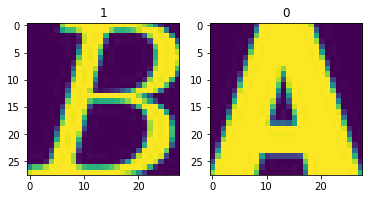

In [31]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

Let's start with layers. The main abstraction here is __`torch.nn.Module`__

In [32]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

There's a vast library of popular layers and architectures already built for ya'.

This is a binary classification problem, so we'll train a __Logistic Regression with sigmoid__.
$$P(y_i | X_i) = \sigma(W \cdot X_i + b) ={ 1 \over {1+e^{- [W \cdot X_i + b]}} }$$


In [33]:
# create a network that stacks layers on top of each other
model = nn.Sequential(
    nn.Linear(784, 1),   # add first "dense" layer with 784 input units and 1 output unit.
    nn.Sigmoid()         # add softmax activation for probabilities. Normalize over axis 1
                         
)


# note: you can also add layers with model.add_module('l1', ), all layer names must be unique


In [34]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [35]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are tensors
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

tensor([0.5341, 0.5961, 0.6509], grad_fn=<SelectBackward0>)

Let's now define a loss function for our model.

The natural choice is to use binary crossentropy (aka logloss, negative llh):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$
Your task is to implement crossentropy loss __manually__ without using `torch.nn.functional`. 



In [36]:
def BinaryCrossEntropy(y_true, y_pred):
    y_pred = torch.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = y_true * torch.log(y_pred + 1e-7)
    term_1 = (1-y_true) * torch.log(1-y_pred + 1e-7)
    return -(term_0+term_1)

crossentropy = BinaryCrossEntropy(y, y_predicted) # YOUR CODE

loss = torch.mean(crossentropy, dim=0) # YOUR CODE

assert tuple(crossentropy.size()) == (3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == tuple(), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(3), "Loss is too large even for untrained model. Please double-check it."

__Note:__ you can also find crossentropy loss in `torch.nn.functional`, just type __`F.<tab>`__. However, it operates on raw logits instead of probabilities.

__Torch optimizers__

When we trained Linear Regression above, we had to manually .zero_() gradients on both our tensors. Imagine that code for a 50-layer network.

Again, to keep it from getting dirty, there's `torch.optim` module with pre-implemented algorithms:

In [37]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01)

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [38]:
# dispose of old tensors to avoid bugs later
del x, y, y_predicted, loss, y_pred

NameError: name 'y_pred' is not defined

### Putting it all together

In [73]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [74]:
history = []

for i in range(100):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)

    # predict probabilities
    y_predicted = model(x_batch)[:, 0]

    assert y_predicted.dim() == 1, "did you forget to select first column with [:, 0]"

    # compute loss, just like before
    loss = F.binary_cross_entropy(y_predicted, y_batch)
    
#     crossentropy = BinaryCrossEntropy(y_batch, y_predicted) # YOUR CODE
#     loss = torch.mean(crossentropy, dim=0)

    # compute gradients
    loss.backward()

    # Adam step
    opt.step()

    # clear gradients
    opt.zero_grad()

    history.append(loss.data.numpy())

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.795
step #10 | mean loss = 0.440
step #20 | mean loss = 0.237
step #30 | mean loss = 0.181
step #40 | mean loss = 0.158
step #50 | mean loss = 0.131
step #60 | mean loss = 0.131
step #70 | mean loss = 0.122
step #80 | mean loss = 0.126
step #90 | mean loss = 0.108


__Debugging tips:__
* make sure your model predicts probabilities correctly. Just print them and see what's inside.
* don't forget _minus_ sign in the loss function! It's a mistake 99% ppl do at some point.
* make sure you zero-out gradients after each step. Srsly:)
* In general, pytorch's error messages are quite helpful, read 'em before you google 'em.
* if you see nan/inf, print what happens at each iteration to find our where exactly it occurs.
  * If loss goes down and then turns nan midway through, try smaller learning rate. (Our current loss formula is unstable).


### Evaluation

Let's see how our model performs on test data

In [90]:
# use your model to predict classes (0 or 1) for all test samples
x_test_batch = torch.tensor(X_test, dtype=torch.float32)
predicted_y_test = model(x_test_batch)[:,0].detach().numpy() # YOUR CODE
predicted_y_test[predicted_y_test > 0.5] = 1
predicted_y_test[predicted_y_test <= 0.5] = 0
predi

print(predicted_y_test.shape)
print(y_test.shape)
print(predicted_y_test)

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

(937,)
(937,)
[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 

## More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)

```

```

```

```

```

```

```

```

```

```